In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd 
from sklearn import metrics

from keras.optimizers import Adam
from keras.models import Model
from keras.models import Sequential
from keras.layers import TimeDistributed
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import LSTM, Reshape


# Graphs

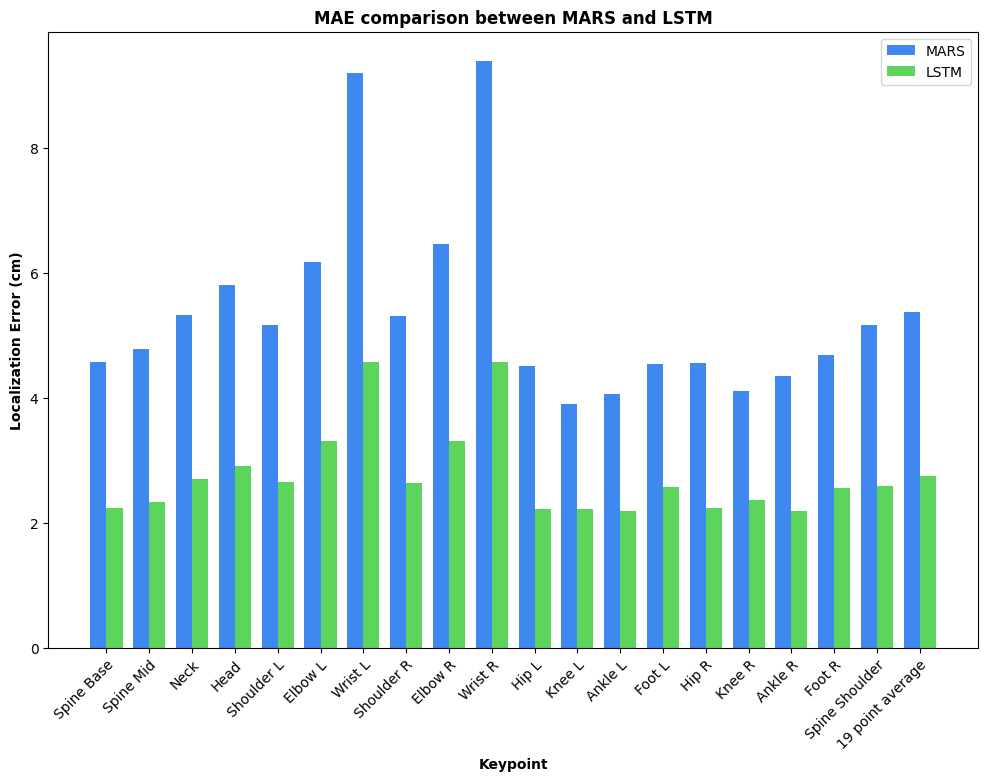

In [13]:
# Bar graph comparing localization error of two models

# Load the accuracy data
MARS_accuracy_data = np.load('models/Accuracy/MARS_accuracy.npy')
LSTM_accuracy_data = np.load('models/Accuracy/LSTM_rsf_16_accuracy.npy')


keypoint_labels = np.array(['Spine Base', 'Spine Mid', 'Neck', 'Head', 'Shoulder L', 'Elbow L', 'Wrist L', 'Shoulder R', 'Elbow R', 'Wrist R', 
                        'Hip L', 'Knee L', 'Ankle L', 'Foot L', 'Hip R', 'Knee R', 'Ankle R', 'Foot R', 'Spine Shoulder', '19 point average'])
n_keypoints = len(keypoint_labels)

mae = np.array([MARS_accuracy_data[:, 6], LSTM_accuracy_data[:, 6]])
rmse = np.array([MARS_accuracy_data[:, 7], LSTM_accuracy_data[:, 7]])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(n_keypoints) * 2
width = 0.75

# Plot the data
ax.bar(x - width/2, mae[0], width, label='MARS', color='#3e88ef')
ax.bar(x + width/2, mae[1], width, label='LSTM', color='#5dd55d')

# Add values on top of the bars
# for i in range(n_keypoints):
#     ax.text(x[i] + 0.05, localization_error[0, i] + 0.1, f'{localization_error[0, i]:.2f}', ha='center', va='bottom', weight='bold', color='#3e88ef')
#     ax.text(x[i] + width + 0.05, localization_error[1, i] + 0.1, f'{localization_error[1, i]:.2f}', ha='center', va='bottom', weight='bold', color='#5dd55d')

# Add labels and legend
ax.set_title('MAE comparison between MARS and LSTM', weight='black')
ax.set_xticks(x)
ax.set_xticklabels(keypoint_labels, rotation=45, ha='right', rotation_mode='anchor', va='top')
ax.set_ylabel('Localization Error (cm)', weight='black')
ax.set_xlabel('Keypoint', weight='black')
ax.legend()
plt.show(block=True)
# plt.savefig('models/Accuracy/localization_error_MARS_vs_LSTM.png')




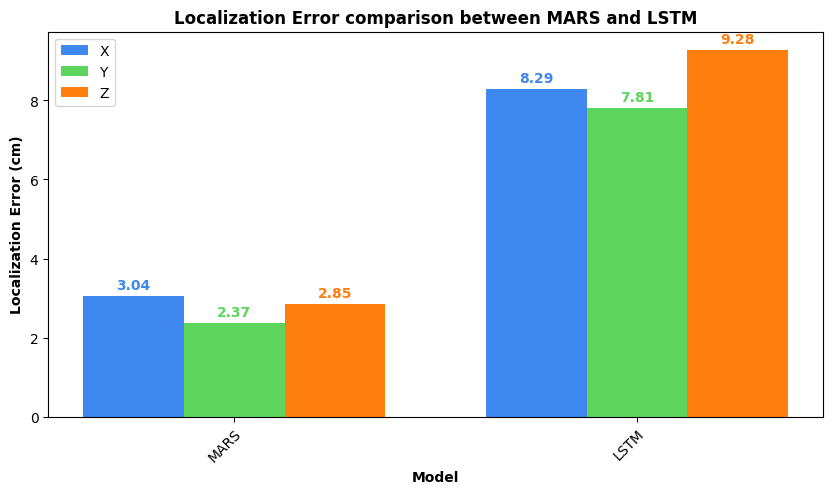

In [30]:
# Bar graph of Localization error for each axis for MARS and LSTM

# Load the accuracy data
MARS_accuracy_data = np.load('models/Accuracy/LSTM_rsf_16_accuracy.npy')
LSTM_accuracy_data = np.load('models/Accuracy/AST_LSTM_3_accuracy.npy')

axis_labels = np.array(['MARS', 'LSTM'])
n_models = len(axis_labels)

mae = np.array([MARS_accuracy_data[19, [0, 2, 4]], LSTM_accuracy_data[19, [0, 2, 4]]])
rmse = np.array([MARS_accuracy_data[19, [1, 3, 5]], LSTM_accuracy_data[19, [1, 3, 5]]])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(n_models)
width = 0.5

# Plot the data grouped by axis
ax.bar(x - width / 2, mae[:, 0], width/2, label='X', color='#3e88ef')
ax.bar(x, mae[:, 1], width/2, label='Y', color='#5dd55d')
ax.bar(x + width / 2, mae[:, 2], width/2, label='Z', color='#ff7f0e')

# Add values on top of the bars
for i in range(n_models):
    ax.text(x[i] - width / 2, mae[i, 0] + 0.1, f'{mae[i, 0]:.2f}', ha='center', va='bottom', weight='bold', color='#3e88ef')
    ax.text(x[i], mae[i, 1] + 0.1, f'{mae[i, 1]:.2f}', ha='center', va='bottom', weight='bold', color='#5dd55d')
    ax.text(x[i] + width / 2, mae[i, 2] + 0.1, f'{mae[i, 2]:.2f}', ha='center', va='bottom', weight='bold', color='#ff7f0e')

# Add labels and legend
ax.set_title('Localization Error comparison between MARS and LSTM', weight='black')
ax.set_xticks(x)
ax.set_xticklabels(axis_labels, rotation=45, ha='right', rotation_mode='anchor', va='top')
ax.set_ylabel('Localization Error (cm)', weight='black')
ax.set_xlabel('Model', weight='black')
ax.legend()

# Set the y-axis limits
# ax.set_ylim(0, 8)

plt.show(block=True)




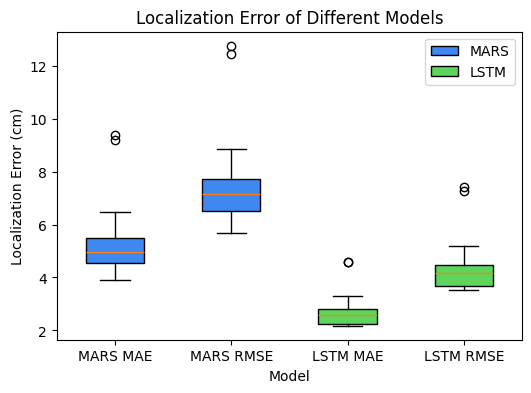

In [84]:
import numpy as np

mars  = np.load('models/Accuracy/MARS_accuracy.npy')
lstm = np.load('models/Accuracy/LSTM_rsf_16_accuracy.npy')
lstm_ast = np.load('models/Accuracy/AST_LSTM_3_accuracy.npy')

mars_mae = mars[:,6]
mars_rmse = mars[:,7]

lstm_mae = lstm[:,6]
lstm_rmse = lstm[:,7]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Create a list of data arrays for each model
data = [mars_mae, mars_rmse, lstm_mae, lstm_rmse]

# Create a list of labels for each model
labels = ['MARS MAE', 'MARS RMSE', 'LSTM MAE', 'LSTM RMSE']
colors = ['#3e88ef', '#3e88ef', '#5dd55d', '#5dd55d']

# Create the box plot
bplot = ax.boxplot(data, patch_artist=True, tick_labels=labels, widths=0.5)

# Set the colors of the boxes
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Localization Error (cm)')
ax.set_title('Localization Error of Different Models')

# Add legend (color to model mapping)
ax.legend([bplot["boxes"][0], bplot["boxes"][2]], ['MARS', 'LSTM'])


plt.show(block=True)



